In [1]:
import numpy 
def generate_collinear_data(range, noise_scale, size, seed):
    rng = numpy.random.default_rng(seed = seed)
    sample = rng.uniform(low=range[0], high = range[1], size=size)
    new_col = 3*sample[:, 1] + 4*sample[:, 3] - 2*sample[:,2] + rng.normal(loc=0, scale=0.01, size=sample.shape[0])
    new_col = numpy.reshape(new_col, (-1,1))
    new_sample = numpy.hstack((sample, new_col))
    m = rng.integers(low=-10, high=10, size=(new_sample.shape[1], 1))
    ys = numpy.dot(new_sample, m)
    noise = rng.normal(loc=0, scale=noise_scale, size=ys.shape)
    return (new_sample, ys+noise)

x, y = generate_collinear_data([0,20], 1, (500, 19), 6666)
y = numpy.array([j for i in y for j in i])
print(x.shape, y.shape)

(500, 20) (500,)


In [2]:
# 80% as train and 20% as test
x_train, x_test = x[ :int(len(x)*0.8)], x[int(len(x)*0.8): ]
y_train, y_test = y[ :int(len(x)*0.8)], y[int(len(x)*0.8): ]

print(x_train[0])
print(y_train[0])

[ 1.82238494  6.39081315  2.62539661 12.7215147   3.04510618 14.0489391
  8.48758822 10.03976479 12.29243291 10.26888273 13.82537473 18.38841627
 12.4633767  13.74492109  6.66670617 19.98201837 17.29485915 17.56343426
 11.83798967 64.81967052]
-141.53119154964838


In [3]:
# get model and predict
from Gradient_Dcision_Tree import GradientBoostingTree

model = GradientBoostingTree()
model.fit(x_train, y_train)

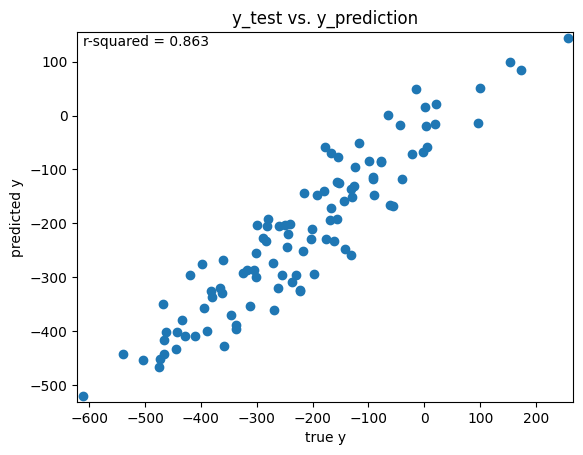

In [4]:
# test model performance
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

pred = model.predict(x_test)

r2 = r2_score(y_test, pred)

plt.title('y_test vs. y_prediction')
plt.xlabel('true y')
plt.ylabel('predicted y')
plt.annotate("r-squared = {:.3f}".format(r2), (min(y_test), max(pred)-15))

plt.xlim(min(y_test)-10, max(y_test)+10)
plt.ylim(min(pred)-10, max(pred)+10)
plt.scatter(y_test, pred)
plt.show()